In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import leafmap.kepler as leafmap
import seaborn as sns
import re
from geopy.geocoders import Nominatim

In [176]:
data = pd.read_csv("Sales Data.csv")
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [82]:
data.shape

(185950, 11)

In [83]:
data.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [85]:
data.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [86]:
data.duplicated().sum()

0

In [87]:
def standardize_address(address):
    # Replace common abbreviations
    address = address.replace("St.", "Street").replace("Ave", "Avenue")

    # Convert to title case
    address = address.title()

    # Remove extra spaces and punctuation
    address = re.sub(r'\s+', ' ', address).strip()

    return address

In [88]:
data['standardized_address'] = data['Purchase Address'].apply(standardize_address)

In [89]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,standardized_address
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,"136 Church St, New York City, Ny 10001"
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,"562 2Nd St, New York City, Ny 10001"
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,"277 Main St, New York City, Ny 10001"
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,"410 6Th St, San Francisco, Ca 94016"
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,"43 Hill St, Atlanta, Ga 30301"


In [90]:
data["Quantity Ordered"].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [91]:
data.shape

(185950, 12)

In [104]:
data.columns = [col.strip() for col in data.columns]

In [92]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [93]:
data["Year"] = data["Order Date"].dt.year

In [94]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,standardized_address,Year
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,"136 Church St, New York City, Ny 10001",2019
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,"562 2Nd St, New York City, Ny 10001",2019
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,"277 Main St, New York City, Ny 10001",2019
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,"410 6Th St, San Francisco, Ca 94016",2019
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,"43 Hill St, Atlanta, Ga 30301",2019


In [172]:
total_sales = data["Sales"].sum()
print(f" Total Sales : {total_sales}")

 Total Sales : 34492035.97


In [173]:
quantity_ordered = data["Quantity Ordered"].sum()
print(f"Total Quantity Order : {quantity_ordered}")

Total Quantity Order : 209079


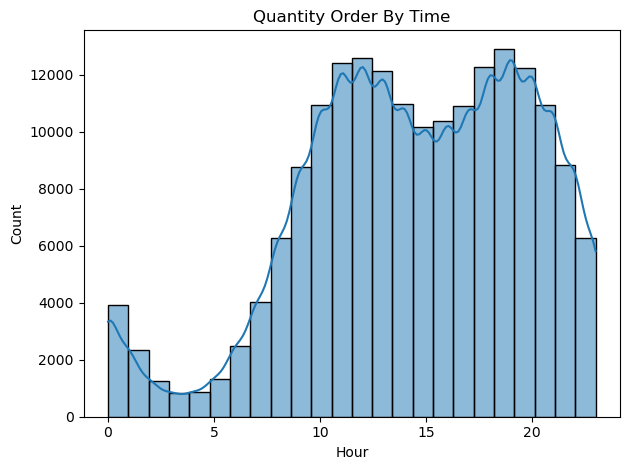

In [154]:
sns.histplot(data = data,
             x = "Hour", 
             bins = 24, 
             kde= True)
plt.title('Quantity Order By Time')
plt.tight_layout()

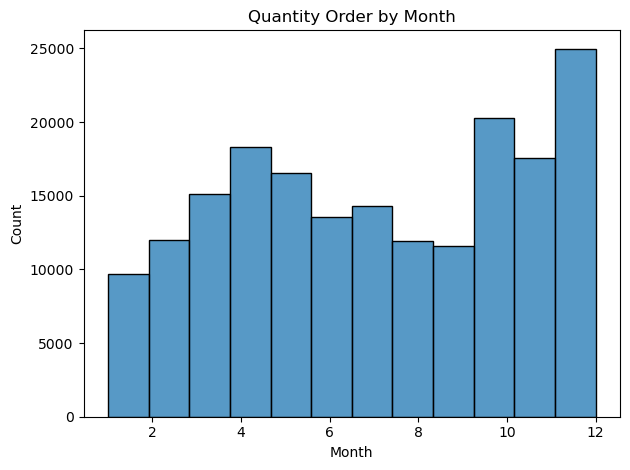

In [155]:
sns.histplot(data = data,
             x = "Month", 
             bins = 12, 
             kde= False,
            )
plt.title('Quantity Order by Month')
plt.tight_layout()

<Axes: >

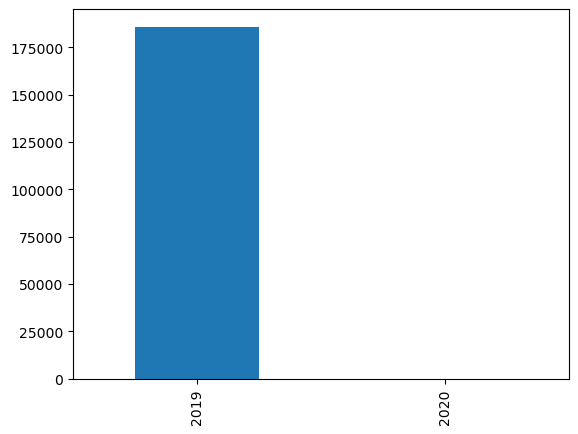

In [159]:
data["Year"].value_counts().plot(kind = "bar" )

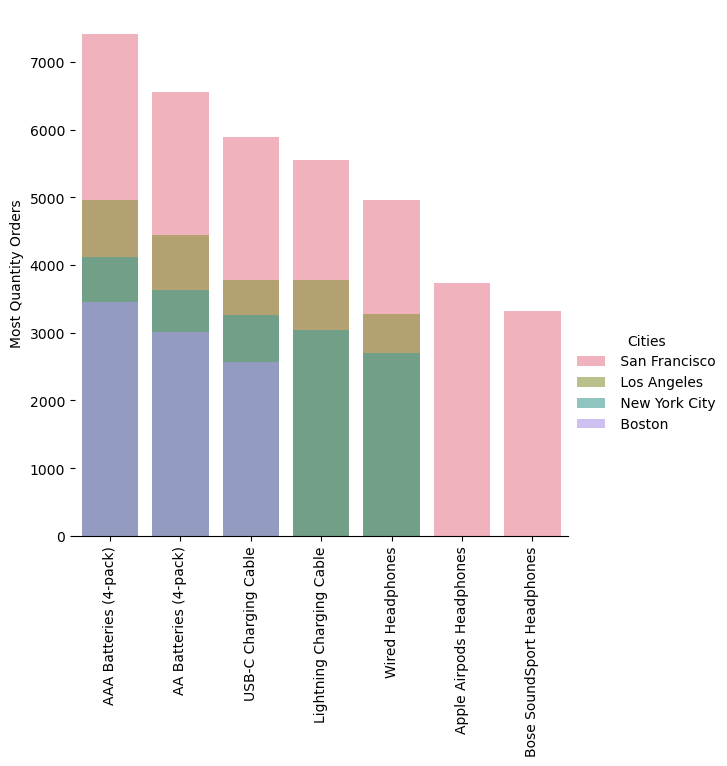

In [129]:
most_product_order = data.groupby(["City","Product"])["Quantity Ordered"].sum().nlargest(20)
most_product_order= pd.DataFrame(most_product_order)
most_product_order.reset_index(inplace = True)
most_product_order.columns = ["City","Product", "Quantity"]
most_product_order.sort_values(by = "Quantity", ascending = False)

ax = sns.catplot(
    data=most_product_order, kind="bar",
    x="Product", y="Quantity", hue="City",
    errorbar="sd", palette="husl", alpha=.6, height=6, dodge=False
)
plt.xticks(rotation = 90)
ax.despine(left=True)
ax.set_axis_labels("", "Most Quantity Orders")
ax.legend.set_title("Cities")

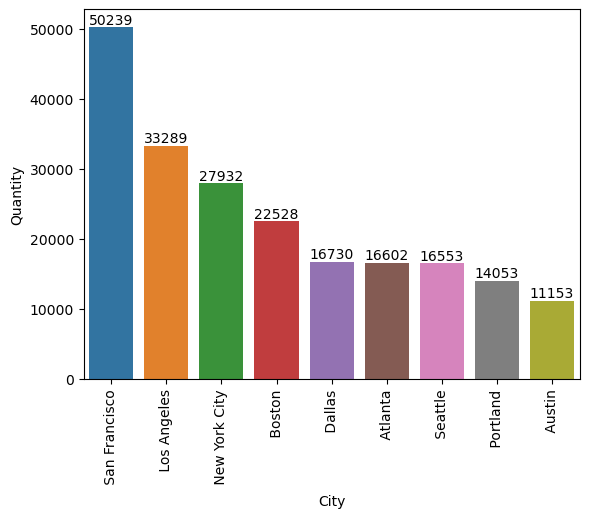

In [98]:
order_quantity_city = data.groupby("City")["Quantity Ordered"].sum().nlargest(10)
order_quantity_city= pd.DataFrame(order_quantity_city)
order_quantity_city.reset_index(inplace = True)
order_quantity_city.columns = ["City", "Quantity"]
order_quantity_city.sort_values(by = "Quantity", ascending = False)
ax = sns.barplot(data = order_quantity_city, x = 'City', y = "Quantity")
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)

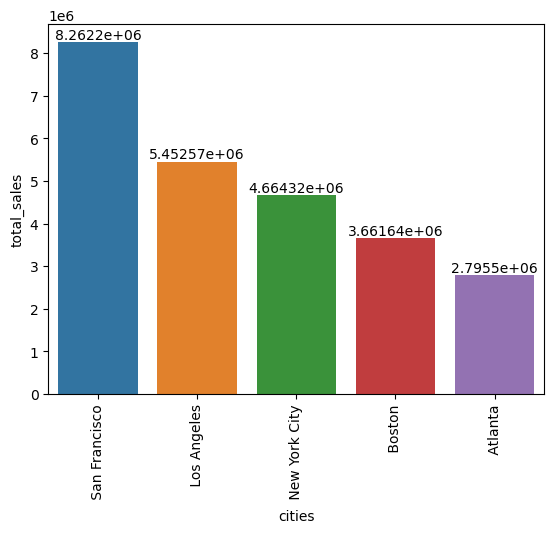

In [175]:
city_sales = data.groupby("City")["Sales"].sum().nlargest(5)
city_sales = pd.DataFrame(city_sales)
city_sales.reset_index(inplace = True)
city_sales.columns = ["cities", "total_sales"]
city_sales['total_sales'] = city_sales['total_sales'].apply(lambda x: round(x, 2))
city_sales.sort_values(by = "total_sales", ascending = False)
ax = sns.barplot(data = city_sales, x = 'cities', y = "total_sales")
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)

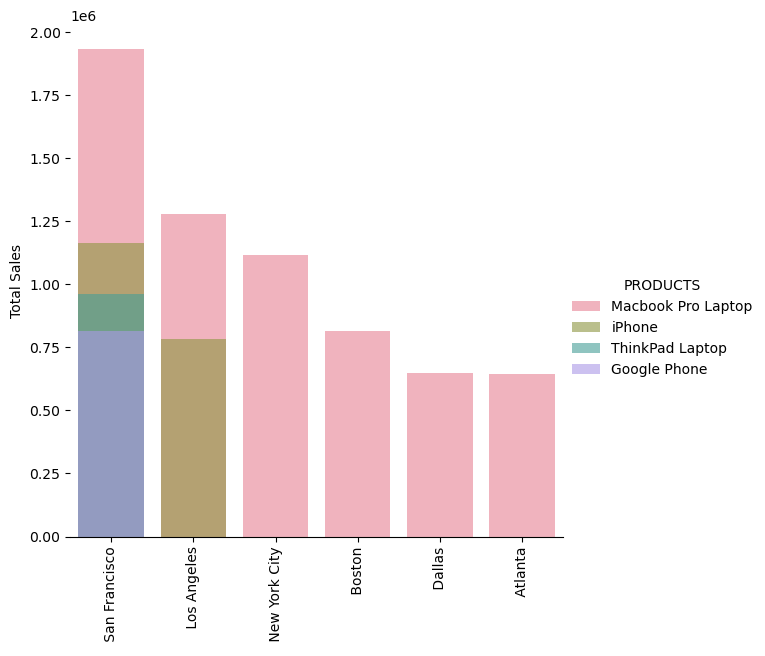

In [170]:
city_sales_product = data.groupby(["City", "Product"])["Sales"].sum().nlargest(10)
city_sales_product = pd.DataFrame(city_sales_product)
city_sales_product.reset_index(inplace = True)
city_sales_product.columns = ["city","product","total_sales"]
city_sales_product.sort_values(by = "total_sales", ascending = False)

ax = sns.catplot(
    data=city_sales_product, kind="bar",
    x="city", y="total_sales", hue="product",
    errorbar="sd", palette="husl", alpha=.6, height=6, dodge=False
)
plt.xticks(rotation = 90)
ax.despine(left=True)
ax.set_axis_labels("", "Total Sales")
ax.legend.set_title("PRODUCTS")